<a href="https://colab.research.google.com/github/okana2ki/hotel-analysis/blob/main/hotel_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import pandas as pd

# 新しくアップロードされたCSVファイルのパスを更新します
input_file = '観光_国内_宿泊施設_宿泊施設_2011～2015.csv'
output_file = 'filtered_output.csv'

# エンコーディングをShift-JISとしてCSVファイルを読み込む
df = pd.read_csv(input_file, encoding='shift_jis')

# B列が0ではない、かつG列が100の行のみをフィルタリング
# filtered_rows = df[(df.iloc[:, 1] != 0) & (df.iloc[:, 6] == 100)]

# B列が0ではない、かつ、C列が0ではない、かつG列が100の行のみをフィルタリング
filtered_rows = df[(df.iloc[:, 1] != 0) & (df.iloc[:, 2] != 0) & (df.iloc[:, 6] == 100)]

# フィルタリングされたデータをCSVに書き出す
filtered_rows.to_csv(output_file, index=False, encoding='shift_jis')

output_file

'filtered_output.csv'

In [16]:
# 新しくアップロードされた2つのCSVファイルのパスを更新します
input_file_1 = '観光_国内_宿泊施設_宿泊施設_2016～2020.csv'
input_file_2 = '観光_国内_宿泊施設_宿泊施設_2021～2022.csv'

# それぞれのファイルを読み込み、指定されたフィルタリングを適用します
df_1 = pd.read_csv(input_file_1, encoding='shift_jis')
filtered_df_1 = df_1[(df_1.iloc[:, 1] != 0) & (df_1.iloc[:, 2] != 0) & (df_1.iloc[:, 6] == 100)]

df_2 = pd.read_csv(input_file_2, encoding='shift_jis')
filtered_df_2 = df_2[(df_2.iloc[:, 1] != 0) & (df_2.iloc[:, 2] != 0) & (df_2.iloc[:, 6] == 100)]

# 先ほどのフィルタリング後のファイルを読み込みます
previous_filtered_file = 'filtered_output.csv'
previous_filtered_df = pd.read_csv(previous_filtered_file, encoding='shift_jis')

# これらのデータフレームを連結します
concatenated_df = pd.concat([previous_filtered_df, filtered_df_1, filtered_df_2])

# 結果を新しいファイルに書き出します
concatenated_file = 'concatenated_filtered_data.csv'
concatenated_df.to_csv(concatenated_file, index=False, encoding='shift_jis')

concatenated_file

'concatenated_filtered_data.csv'

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
!pip install japanize_matplotlib
import japanize_matplotlib

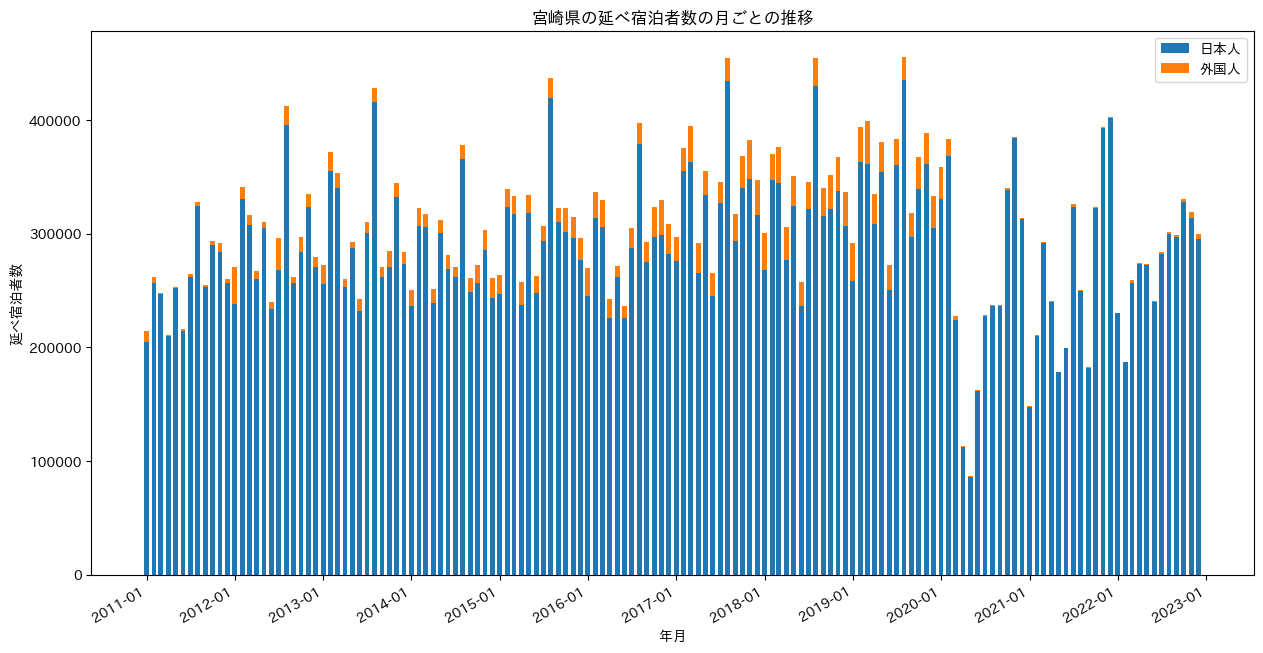

In [18]:
# データファイルを読み込みます
previous_concatenated_file = 'concatenated_filtered_data.csv'
data = pd.read_csv(previous_concatenated_file, encoding='shift_jis')

# グラフ化する都道府県名を指定
prefecture_name = '宮崎県'
# prefecture_name = '京都府'
# prefecture_name = '大分県'
# prefecture_name = '山口県'
# prefecture_name = '福岡県'
# prefecture_name = '東京都'

# 指定した都道府県のデータだけをフィルタ
prefecture_data = data[data['都道府県名'] == prefecture_name]

# SettingWithCopyWarningという警告が出ないようにコピーを作成
prefecture_data_copy = prefecture_data.copy()

# プロットしやすいように'年月'列を追加
prefecture_data_copy['年月'] = pd.to_datetime(prefecture_data_copy['集計年'].astype(str) + '-' + prefecture_data_copy['集計月'].astype(str))

# データを'年月'でソート
sorted_data = prefecture_data_copy.sort_values(by='年月')

# 積み上げ棒グラフ
plt.figure(figsize=(15, 8))
plt.bar(sorted_data['年月'], sorted_data['延べ宿泊者数（日本人：人泊）'], label='日本人', width=20)
plt.bar(sorted_data['年月'], sorted_data['延べ宿泊者数（外国人：人泊）'], bottom=sorted_data['延べ宿泊者数（日本人：人泊）'], label='外国人', width=20)

# 横軸の設定（年月の表示）
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gcf().autofmt_xdate() # Rotation

# 軸ラベルとタイトルの設定、凡例の表示
plt.xlabel('年月')
plt.ylabel('延べ宿泊者数')
plt.title(f'{prefecture_name}の延べ宿泊者数の月ごとの推移')
plt.legend()

# グラフの表示
plt.show()

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
!pip install japanize_matplotlib
import japanize_matplotlib

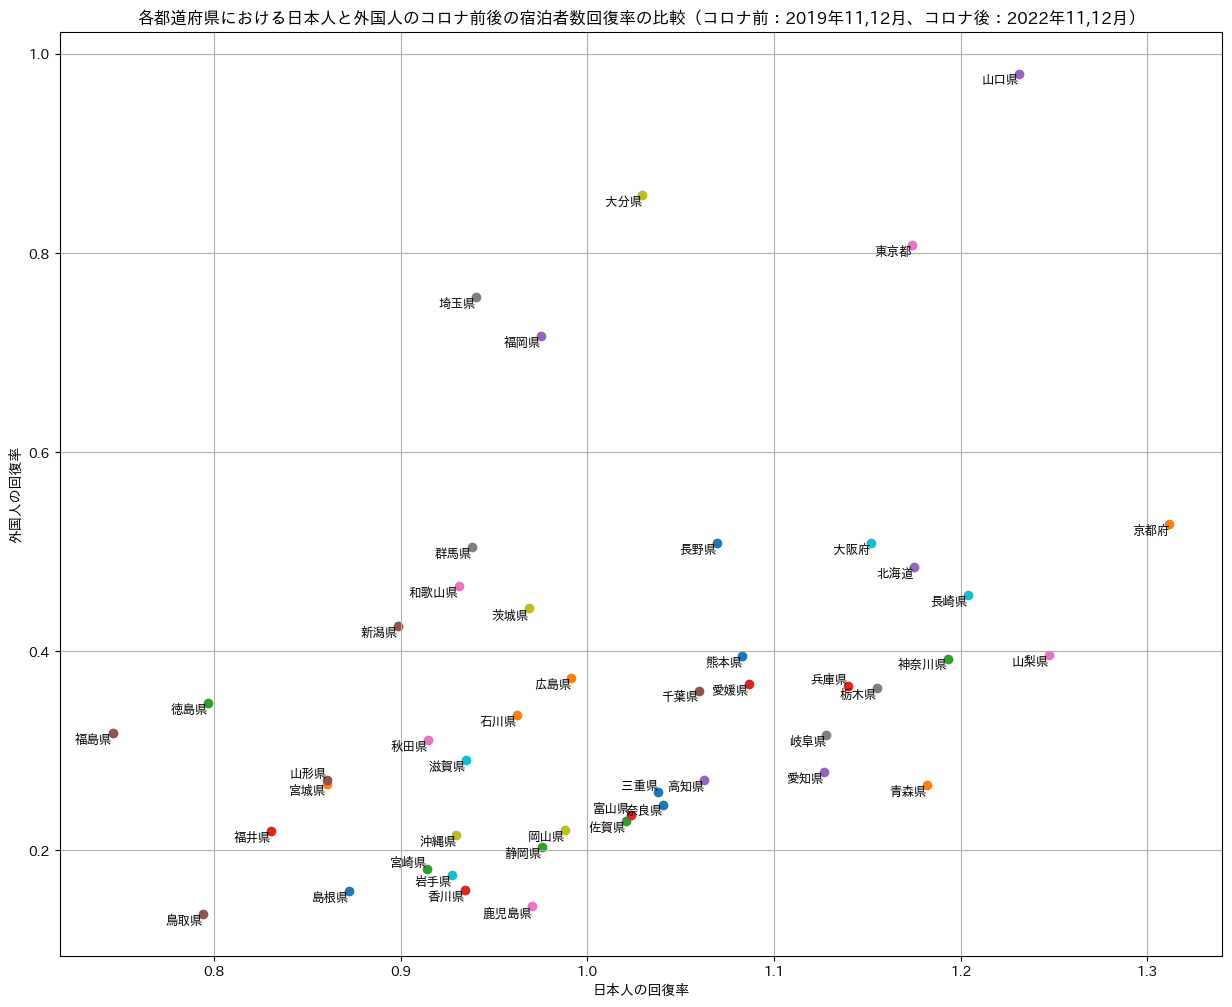

In [19]:
# CSV ファイルの読み込み
file_path = 'concatenated_filtered_data.csv'
data = pd.read_csv(file_path, encoding='shift_jis')

# 2022年11月と12月のデータを抽出：コロナ後
data_2022 = data[(data['集計年'] == 2022) & (data['集計月'].isin([11, 12]))]

# 2019年11月と12月のデータを抽出：コロナ前
data_2019 = data[(data['集計年'] == 2019) & (data['集計月'].isin([11, 12]))]

# 各都道府県ごとにデータをグループ化し、合計を計算
sum_2022 = data_2022.groupby('都道府県名').agg({'延べ宿泊者数（日本人：人泊）': 'sum', '延べ宿泊者数（外国人：人泊）': 'sum'})
sum_2019 = data_2019.groupby('都道府県名').agg({'延べ宿泊者数（日本人：人泊）': 'sum', '延べ宿泊者数（外国人：人泊）': 'sum'})

# コロナ前後の回復率を計算
recovery_data = sum_2022 / sum_2019
recovery_data.columns = ['日本人の回復率', '外国人の回復率']

# 散布図の作成、プロット点の近くに都道府県名を表示
plt.figure(figsize=(15, 12))
for prefecture in recovery_data.index:
    x = recovery_data.loc[prefecture, '日本人の回復率']
    y = recovery_data.loc[prefecture, '外国人の回復率']
    plt.scatter(x, y)
    # plt.text(x, y, prefecture, fontsize=9, ha='right')  # 都道府県名を表示

    # 文字が重なってしまう都道府県名の表示位置を調整
    if prefecture in ['山形県', '富山県', '三重県', '兵庫県', '宮崎県']:
        plt.text(x, y, prefecture, fontsize=9, ha='right', va='bottom')
    else:
        plt.text(x, y, prefecture, fontsize=9, ha='right', va='top')

plt.xlabel('日本人の回復率')
plt.ylabel('外国人の回復率')
plt.title('各都道府県における日本人と外国人のコロナ前後の宿泊者数回復率の比較（コロナ前：2019年11,12月、コロナ後：2022年11,12月）')
plt.grid(True)

# グラフを表示
plt.show()

横軸は2022年11月と12月の'延べ宿泊者数（日本人：人泊）'の平均値、縦軸は2022年11月と12月の'延べ宿泊者数（外国人：人泊）'の平均値として、各都道府県の宿泊者数を散布図にして下さい。

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
!pip install japanize_matplotlib
import japanize_matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 15.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for japanize_matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120257 sha256=abd45b44b3595251cc63feb79b339c8efa20bcc418f69bc26b65b61f694b307e
  Stored in directory: /root/.cache/pip/wheels/61/7a/6b/df1f79be9c59862525070e157e62b08eab8ece27c1b68fbb94
Successfully built japanize_matplotlib


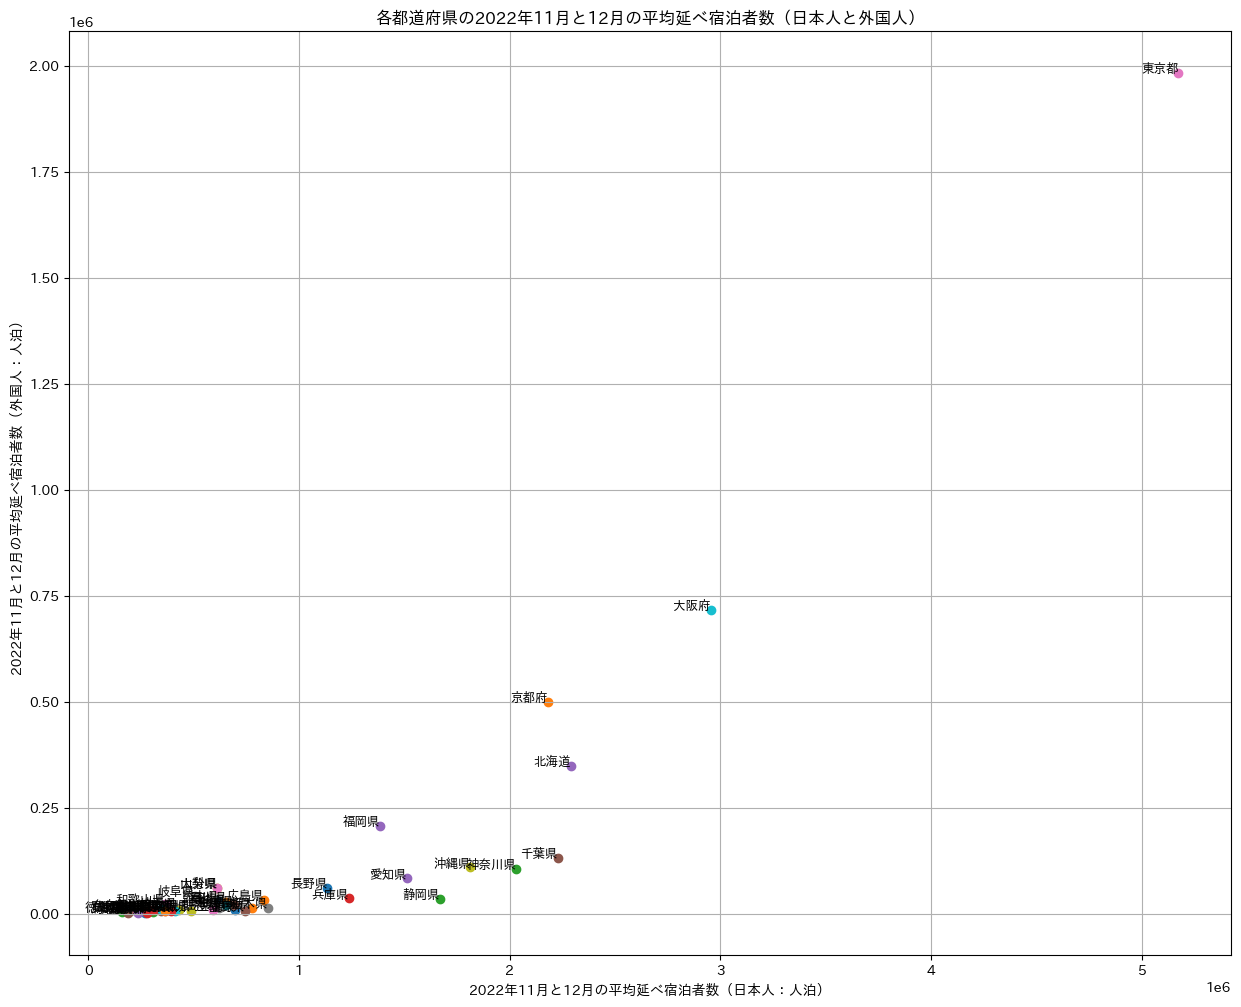

In [20]:
# Re-defining the data path and re-processing the data

data_path = 'concatenated_filtered_data.csv'

# Load the CSV data
data = pd.read_csv(data_path, encoding='shift_jis')

# Filter for November and December 2022
data_2022 = data[(data['集計年'] == 2022) & (data['集計月'].isin([11, 12]))]

# Group by prefecture and calculate the average
avg_2022 = data_2022.groupby('都道府県名').agg({
    '延べ宿泊者数（日本人：人泊）': 'mean',
    '延べ宿泊者数（外国人：人泊）': 'mean'
})

# Create a scatter plot
plt.figure(figsize=(15, 12))
for prefecture in avg_2022.index:
    x = avg_2022.loc[prefecture, '延べ宿泊者数（日本人：人泊）']
    y = avg_2022.loc[prefecture, '延べ宿泊者数（外国人：人泊）']
    plt.scatter(x, y)
    plt.text(x, y, prefecture, fontsize=9, ha='right')

plt.xlabel('2022年11月と12月の平均延べ宿泊者数（日本人：人泊）')
plt.ylabel('2022年11月と12月の平均延べ宿泊者数（外国人：人泊）')
plt.title('各都道府県の2022年11月と12月の平均延べ宿泊者数（日本人と外国人）')
plt.grid(True)

# Show the plot
plt.show()

x軸とy軸を両方とも対数軸にして下さい。

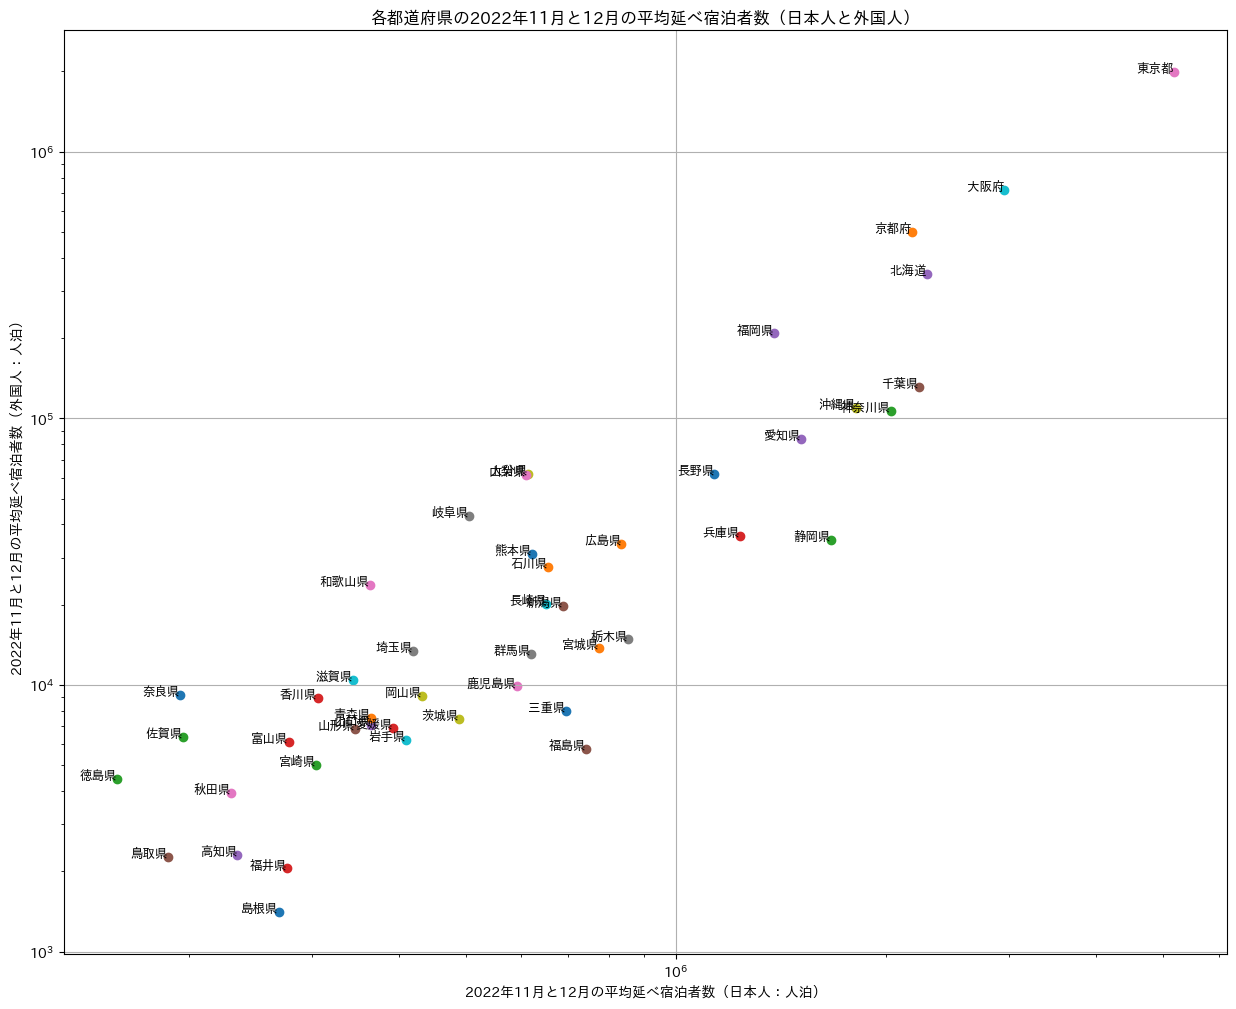

In [21]:
# Creating the scatter plot with both axes on a logarithmic scale

plt.figure(figsize=(15, 12))
for prefecture in avg_2022.index:
    x = avg_2022.loc[prefecture, '延べ宿泊者数（日本人：人泊）']
    y = avg_2022.loc[prefecture, '延べ宿泊者数（外国人：人泊）']
    plt.scatter(x, y)
    plt.text(x, y, prefecture, fontsize=9, ha='right')

plt.xlabel('2022年11月と12月の平均延べ宿泊者数（日本人：人泊）')
plt.ylabel('2022年11月と12月の平均延べ宿泊者数（外国人：人泊）')
plt.title('各都道府県の2022年11月と12月の平均延べ宿泊者数（日本人と外国人）')
plt.grid(True)
plt.xscale('log')  # Set x-axis to logarithmic scale
plt.yscale('log')  # Set y-axis to logarithmic scale

# Show the plot
plt.show()

この散布図に2019年11月と12月の宿泊者数の平均値のプロットも追加して下さい。

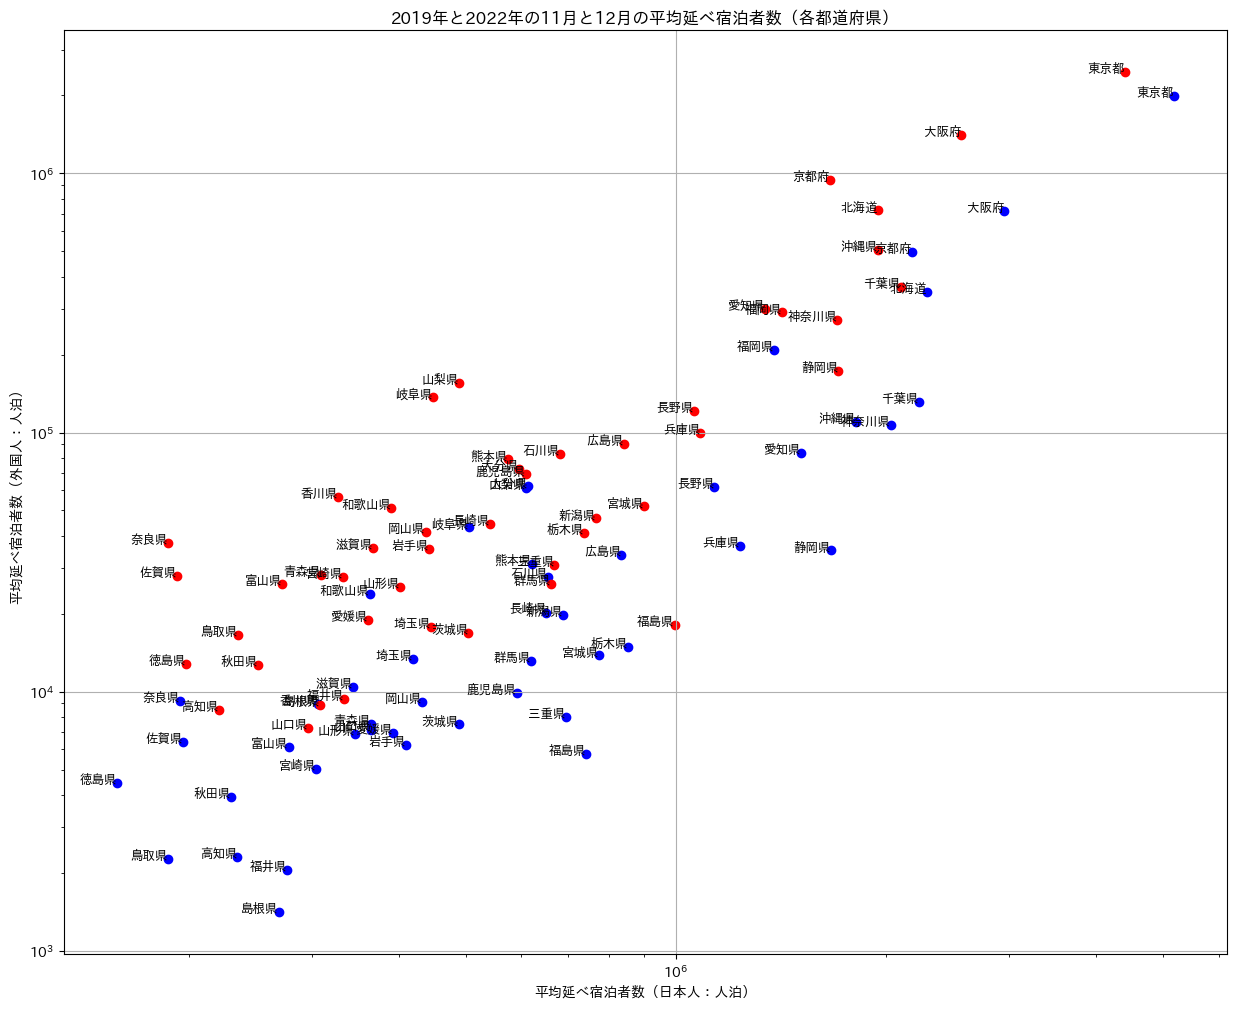

In [22]:
# Adding the average number of overnight stays for November and December 2019 to the scatter plot

# Filter for November and December 2019
data_2019 = data[(data['集計年'] == 2019) & (data['集計月'].isin([11, 12]))]

# Group by prefecture and calculate the average for 2019
avg_2019 = data_2019.groupby('都道府県名').agg({
    '延べ宿泊者数（日本人：人泊）': 'mean',
    '延べ宿泊者数（外国人：人泊）': 'mean'
})

# Create a scatter plot with both 2019 and 2022 data
plt.figure(figsize=(15, 12))

# Plot 2022 data
for prefecture in avg_2022.index:
    x_2022 = avg_2022.loc[prefecture, '延べ宿泊者数（日本人：人泊）']
    y_2022 = avg_2022.loc[prefecture, '延べ宿泊者数（外国人：人泊）']
    plt.scatter(x_2022, y_2022, color='blue')
    plt.text(x_2022, y_2022, prefecture, fontsize=9, ha='right')

# Plot 2019 data
for prefecture in avg_2019.index:
    x_2019 = avg_2019.loc[prefecture, '延べ宿泊者数（日本人：人泊）']
    y_2019 = avg_2019.loc[prefecture, '延べ宿泊者数（外国人：人泊）']
    plt.scatter(x_2019, y_2019, color='red')
    plt.text(x_2019, y_2019, prefecture, fontsize=9, ha='right')

plt.xlabel('平均延べ宿泊者数（日本人：人泊）')
plt.ylabel('平均延べ宿泊者数（外国人：人泊）')
plt.title('2019年と2022年の11月と12月の平均延べ宿泊者数（各都道府県）')
plt.grid(True)
plt.xscale('log')  # Set x-axis to logarithmic scale
plt.yscale('log')  # Set y-axis to logarithmic scale

# Show the plot
plt.show()

同じ都道府県のデータ点を2019年のデータから2022年のデータに向かう↓で矢印で結んで下さい。

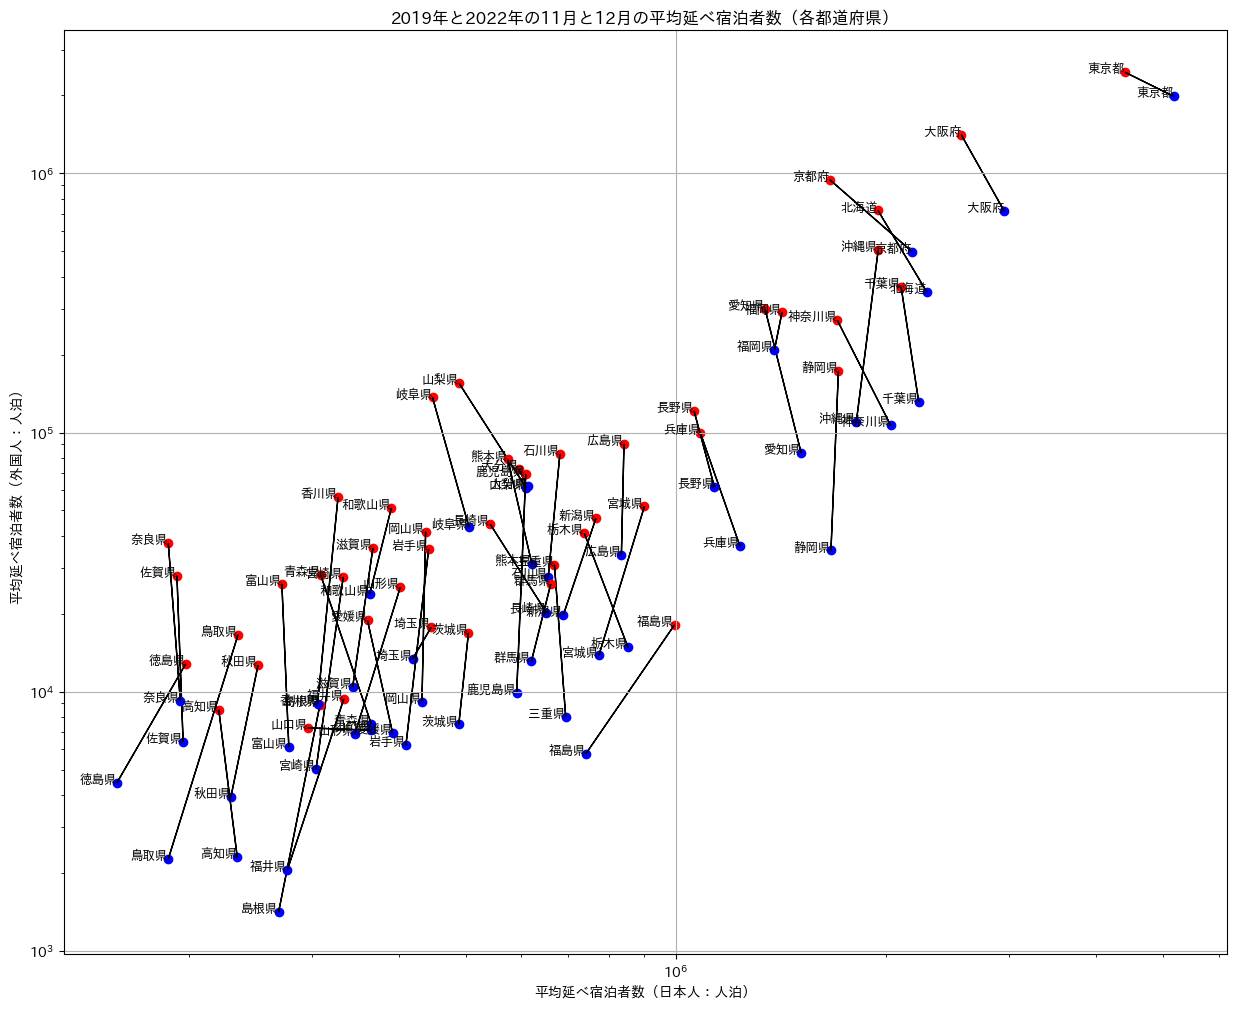

In [23]:
# Re-attempting to create the scatter plot with arrows connecting the 2019 and 2022 data points

plt.figure(figsize=(15, 12))

# Plot data and connect points with arrows
for prefecture in avg_2019.index:
    # 2019 data
    x_2019 = avg_2019.loc[prefecture, '延べ宿泊者数（日本人：人泊）']
    y_2019 = avg_2019.loc[prefecture, '延べ宿泊者数（外国人：人泊）']
    plt.scatter(x_2019, y_2019, color='red')
    plt.text(x_2019, y_2019, prefecture, fontsize=9, ha='right')

    # 2022 data
    if prefecture in avg_2022.index:
        x_2022 = avg_2022.loc[prefecture, '延べ宿泊者数（日本人：人泊）']
        y_2022 = avg_2022.loc[prefecture, '延べ宿泊者数（外国人：人泊）']
        plt.scatter(x_2022, y_2022, color='blue')
        plt.text(x_2022, y_2022, prefecture, fontsize=9, ha='right')

        # Draw arrow from 2019 to 2022 data point
        plt.arrow(x_2019, y_2019, x_2022 - x_2019, y_2022 - y_2019,
                  length_includes_head=True, head_width=0.05, head_length=0.1, fc='black', ec='black')

plt.xlabel('平均延べ宿泊者数（日本人：人泊）')
plt.ylabel('平均延べ宿泊者数（外国人：人泊）')
plt.title('2019年と2022年の11月と12月の平均延べ宿泊者数（各都道府県）')
plt.grid(True)
plt.xscale('log')  # Set x-axis to logarithmic scale
plt.yscale('log')  # Set y-axis to logarithmic scale

# Show the plot
plt.show()